# K-Means Clustering

K-means is the most popular method to apply clustering.

1) Choose the number of clusters to identify <br>
2) Specify the cluster seeds (a starting centroid) <br>
3) Assign each point to a centroid based on proximity <br>
4) Adjust the centroids <br>
5) Repeat 3 and 4. <br>

When no points can be reassigned, K-means is complete

## Basics of cluster analysis

### Import the relevant libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Load the data

In [62]:
data = pd.read_csv('/Users/jackyaffe/Google Drive/Jack/Udemy/DataSci/The Data Science Course 2018 - All Resources/Part_5_Advanced_Statistical_Methods_(Machine_Learning)/S38_L256/3.01. Country clusters.csv')

In [63]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


### Plot the data

<function matplotlib.pyplot.show(*args, **kw)>

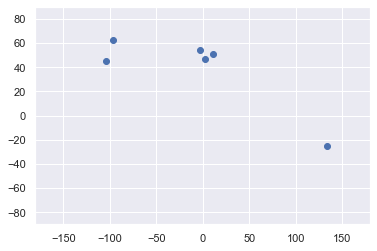

In [64]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

### Select the features

In [65]:
x = data.iloc[:,1:3]

In [66]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


### Clustering

In [67]:
kmeans = KMeans(2) # 2 is the number of clusters we want to produce

In [68]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Clustering results

In [69]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [70]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


<function matplotlib.pyplot.show(*args, **kw)>

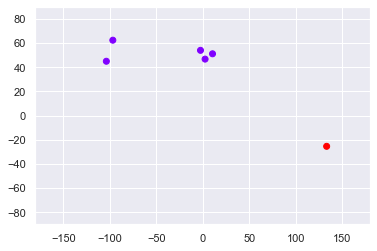

In [71]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

The number of clusters can be changed by changing the variable from 2 to 3 and re-run all the cells.

## Using the language feature

### Map the data

In [72]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0,'French':1,'German':2})
# NB this is not the optimal way to map them, but it will work for now.
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


### Select the features

In [86]:
x = data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


### Clustering

In [87]:
kmeans = KMeans(2)

In [88]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Clustering results

In [89]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [90]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,1


<function matplotlib.pyplot.show(*args, **kw)>

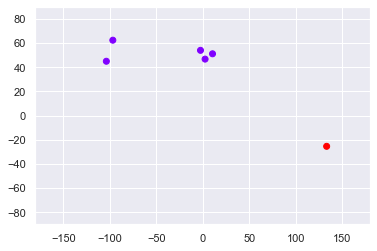

In [91]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

We are still using long and lat as data to plot, as it makes sense for this data as it represents the map of countries.

## How to choose the number of clusters

### The elbow method

For K-means, these two optimisations occur simultaneously: <br>
1) minimise the distance between points in a cluster <br>
2) maximising the distance between clusters <br>

Distance between points in a cluster sounds clumsy, it is also known as 'within-cluster sum of squares' or WCSS.

Similar to SST, SSR and SSE from regressions, WCSS is a measure developed within the ANOVA framework. 

If we minimise WCSS, we have reached the perfect clustering solution. However, if we have 6 countries and we have 6 clusters, the WCSS score is 0, which is the best score. It is not useful. There has to be a middle ground between 1 cluster and n clusters. We dont really want WCSS to be minimised whilst we can still interperet clusters.

When you plot number of clusters against the WCSS, you get a kind of elbow-shaped graph, which gives the elbow-method it's name. This means that initially as you add clusters, the WCSS score decreases rapidly. Then it gets to a period where it decreases at a slower rate, before it reaches a period where the WCSS score decreases very slowly as cluster numbers increase.

You want to have a cluster number right at the flip between improvement and non-improvement in WCSS, i.e. the elbow.

To put this in use, you want the number of clusters (k) and the WCSS for a specific number of clusters.

We set k at the start of the process. 

There is an sklearn method that gives us the WCSS.

### WCSS

In [92]:
kmeans.inertia_

13208.95812

In [97]:
# make a list to hold WCSS scores for clusters between 1 and 6 in size.
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [98]:
wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

You can see the sequence is decreasing with very big leaps in the first two steps.

### The elbow method

Text(0, 0.5, 'Within-cluster Sum of Squares')

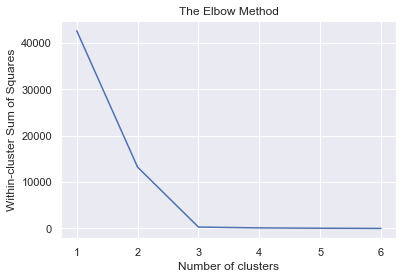

In [99]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

There are two points which could be the elbow. 2 and 3.

A 2 cluster solution would be sub-optimal as the leap from 2 to 3 is very big in WCSS terms.

### Pros and Cons of K-means

Pros: <br>
- simple to understand
- fast to cluster
- widely available
- easy to implement
- always yields a result

Cons: <br>
- we need to pick K
- sensitive to initialisation 
- sensitive to outliers
- produces spherical solutions (because of euclidian distances)
- standardisation

Remedies: <br>
- the elbow method
- k-means++ (determines appropriate seeds for initialisaiton) sklean manages this
- remove outliers


### Standardisation

To standardise or not to standardise?

The ultimate aim of standardisation is to reduce the weight of higher numbers and increase that of lower ones.

If you standardise all points, you can loose all differentiation between the points.

If you dont standardise, the scale of the points per axis indicate the weighting of their importance. K-means can work well with that.

Sometimes you loose some variables if you dont standardise.

It really depends on whether one variable is more important than the other, and you need to decide in advance whether standardisation makes sense or not for each instance of a problem.

### Relationship between clustering and regression

If you run cluster analysis, it can help you identify when you are missing key variables that impact your data.

E.g. you can take a dataset that has 3 major clusters. Two of the clusters can look like they sit against a regression line, but the third is somewhere off that. It could meant that there is a 3rd variable that is important in this relationship where a multi-linear regression could do a better job of explaining.

In this case, clustering can help explore data before running regressions to identify whether the number of variables being studied make sense.

## Market segmentation example

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Load the data

In [101]:
data = pd.read_csv('/Users/jackyaffe/Google Drive/Jack/Udemy/DataSci/The Data Science Course 2018 - All Resources/Part_5_Advanced_Statistical_Methods_(Machine_Learning)/S38_L265/3.12. Example.csv')

In [102]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Satisfaction is self reported. 10 = extremely satisfied
Brand loyalty is tricky, there is no specific way to measure it, but in this dataset it was measured through number of purchases in a year and several other factors found to be significant. It ranges from around -2 to 2 -> it is already standardised.

### Plot the data

Text(0, 0.5, 'Loyalty')

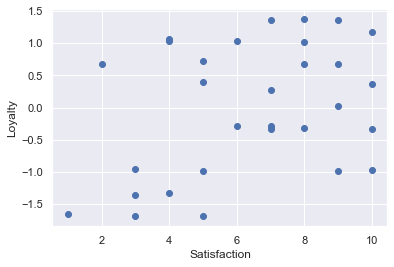

In [103]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

There are two obvious clusters, which kinda looks like a divide that crosses the y axis at 0.5 and the x axis at 8.

Another way to think about it is by splitting this into quadrants:
- low satisfaction, high loyalty
- low satisfaction, low loyalty
- high satisfaction, low loyalty
- high satisfaction, high loyalty


The two cluster solution doesnt make much sense as it would be low satisfaction, low loyalty and then a mixture of everything else.

### Select the features

In [104]:
x = data.copy()

### Clustering

In [105]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Clustering Results

In [106]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

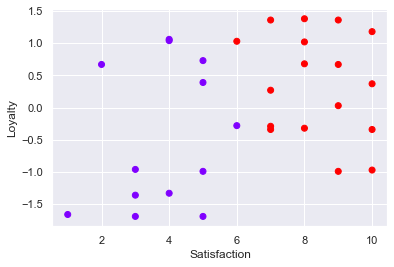

In [107]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

We see two clusters but these arent the two we imagined.

Most probably the algorithm ONLY considered satisfaction as a feature.

We probably need to standardise the satisfaction values, they are much higher than those of loyalty and kmeans probably ignored the loyalty values.

Whenever we cluster on the basis of a single feature, the result looks like this graph.

### Standardise the variables

In [109]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

x_scaled contains the standardised satisfaction and the same values for loyalty (because it was already standardised)

### Take advantage of the Elbow method

In [110]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss
    

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.404966601614363,
 4.315662464700005,
 3.838703081903869]

Text(0, 0.5, 'WCSS')

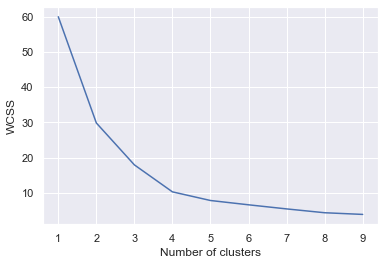

In [111]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Given this graph, we could look to use 2, 3,4 or 5 clusters.

###  Explore clustering solutions and select the number of clusters

In [118]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,3
2,5,-0.99,1
3,7,-0.29,3
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,0
9,8,0.68,0


We will plot the data without standardising the AXES but the solution will be the standardised one.

Text(0, 0.5, 'Loyalty')

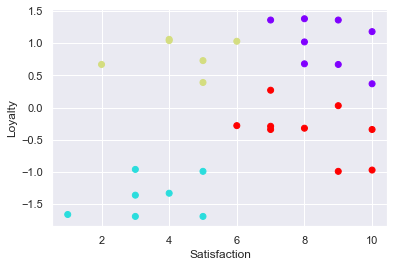

In [119]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

We often choose to plot using the original values for clearer interpretability. Note: the discrepancy we observe here depends on the range of the axes, too.

Comparing this result to the previous one, we can see both variables were brought into account.

We are more confident that standardisation is a good thing (or can be).

This two-cluster solution does not make complete sense, but its a good start.

You can start to namet the clusters, to help interperet them.

The purple cluster (bottom left), can be thought of as alienated customers as they are unsatisfied and unloyal.

The other cluster can be called the 'everything else' cluster.

In unsupervised learning, the algorithm will do the magic but we need to interperet the result.

We can re-run this above code with 3, 4 and 5 clusters to see how the results change.

3 clusters result in the alienated group staying as they were, but the everything else group being split into 2. One (high loyalty, middly-satisfied) are possibly the supporters, the others are 'all that's left' cluster as the features are still mixed.

4 clusters result in the alienated, supporters and two others. One is a satisfied and loyal group, the fans. Another is a highly satisfied but not loyal (some even disloyal), possibly 'roamers'. Like the brand but not particularly loyal to it. 4 is the best solution so far.

5 clusters result in alienatde, supporters and fans unchanged. The roamers are split into two sub-clusters. Those that are extremely satisfied and those that are not. There isnt much more learnt by doing this split.

You can split up to 9, but it becomes hard to name and manage them.

4 is probably the best bet, but 5 might be valuable depending on what you wanted to do with it all.
 

### How is clustering actually useful

Types of analysis:
- exploratory
    - get acquainted with the data
    - search for patterns
    - plan
    - e.g. data visualisation, descriptive, clustering 
- confirmatory
    - explain a phenomenon
    - confirm a hypothesis
    - validate previous research
    - e.g. hypothesis testing and regression analysis
- explanatory
    - same as confirmatiory
    - e.g. clustering
    
    
Clustering can be used for all, but most commonly explanatory.

Clustering can also be used for confirmation of past beliefs. Big adantage of clustering with this can show that market segments change over time.

Consider the 4 clusters from our example above:
- alienated
- supporters
- roamers
- fans

We want to get as many people to be fans as possible. In order to turn supporters into fans, we need to increase their shopping satisfaction. They are already loyal, but they are as close to becoming fans as they are to becoming alienated. We need to take action to make them more satisfied.

If you try to improve satisfaction, you may well move the supporters into the fan club. Interestingly, people in the alienated cluster would end up moving into the roamers cluster too.

The roamers are satisfied but not loyal. If you want them to come more often you might want to open a loyalty programme to make them come more often, moving them to the supporters group. 

It doesnt make sense to address alienated cluster first as they are too far away from fans. 

More and more we encounter targeted ads on internet. One strat is to gather as much info as we can on our fans cluster, then find people with similar age, interests etc as the fans to target in ad campaigns.

Clustering is one of the methods to give this to you.